In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Study Material/Projects/AI Financial and Market Data Analysis/ai_financial_market_daily_realistic_synthetic.csv")

In [3]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [5]:
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [8]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [9]:
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [10]:
df['Year']=df['Date'].dt.year

In [11]:
df.head(10)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
5,2015-01-06,OpenAI,5.47,1.08,8.32,NaN,0.74,2015
6,2015-01-07,OpenAI,6.95,0.67,-32.95,NaN,-0.80,2015
7,2015-01-08,OpenAI,5.06,1.43,43.49,NaN,-0.09,2015
8,2015-01-09,OpenAI,5.26,0.33,-67.28,NaN,-0.72,2015
9,2015-01-10,OpenAI,2.00,0.74,-25.80,NaN,0.50,2015


In [12]:
RD_Expenditure = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()
RD_Expenditure

Company
Google    423341.14
Meta      264533.07
OpenAI     26482.77
Name: R&D_Spending_USD_Mn, dtype: float64

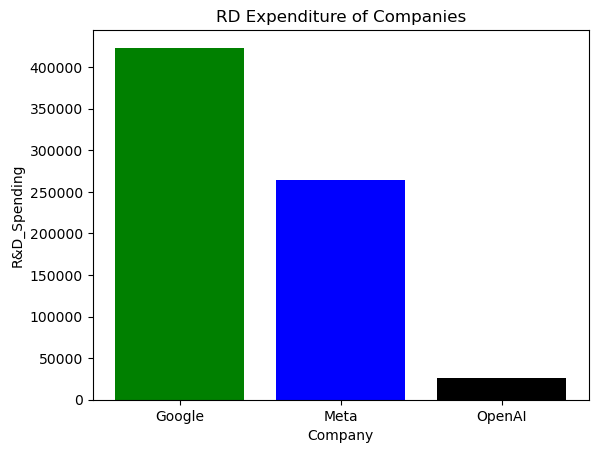

In [13]:
plt.bar(RD_Expenditure.index,RD_Expenditure.values,color=['green','blue','black'])
plt.title('RD Expenditure of Companies')
plt.xlabel('Company')
plt.ylabel('R&D_Spending')
plt.show()

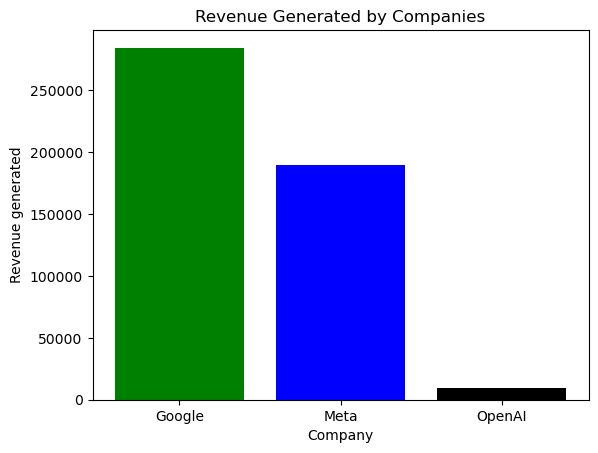

In [14]:
Revenue = df.groupby('Company')['AI_Revenue_USD_Mn'].sum()
plt.bar(Revenue.index,Revenue.values,color=['green','blue','black'])
plt.title('Revenue Generated by Companies')
plt.xlabel('Company')
plt.ylabel('Revenue generated')
plt.show()

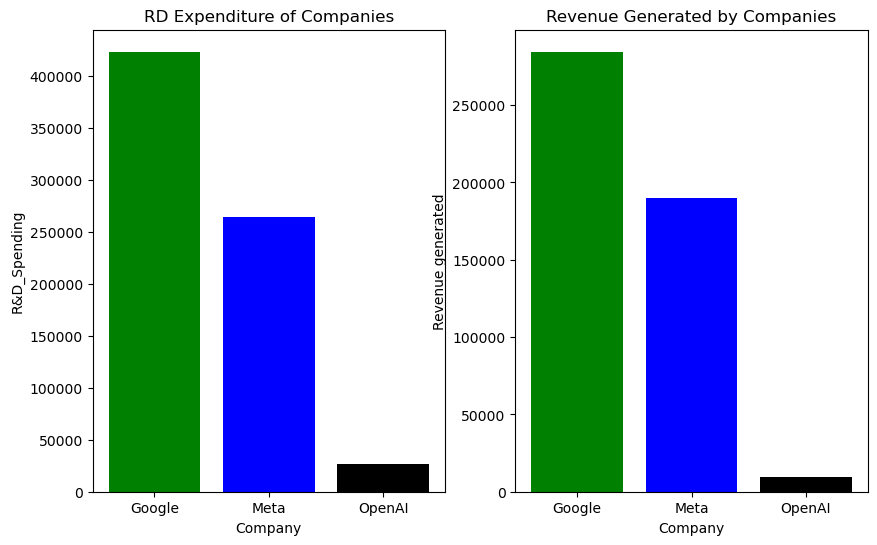

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(RD_Expenditure.index,RD_Expenditure.values,color=['green','blue','black'])
plt.title('RD Expenditure of Companies')
plt.xlabel('Company')
plt.ylabel('R&D_Spending')

plt.subplot(1,2,2)
plt.bar(Revenue.index,Revenue.values,color=['green','blue','black'])
plt.title('Revenue Generated by Companies')
plt.xlabel('Company')
plt.ylabel('Revenue generated')

plt.show()

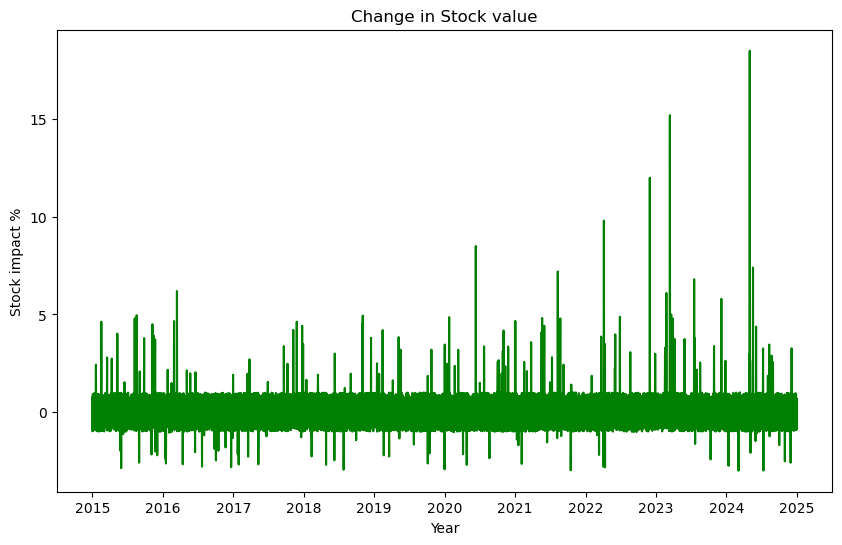

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'],df['Stock_Impact_%'],color='green')
plt.title('Change in Stock value')
plt.xlabel('Year')
plt.ylabel('Stock impact %')
plt.show()

In [17]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [18]:
OpenAI_df = df[df['Company'] == 'OpenAI']

In [19]:
Google_df = df[df['Company'] == 'Google']

In [20]:
Meta_df = df[df['Company'] == 'Meta']

In [21]:
Meta_df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


In [22]:
OpenAI_df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


In [23]:
Google_df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


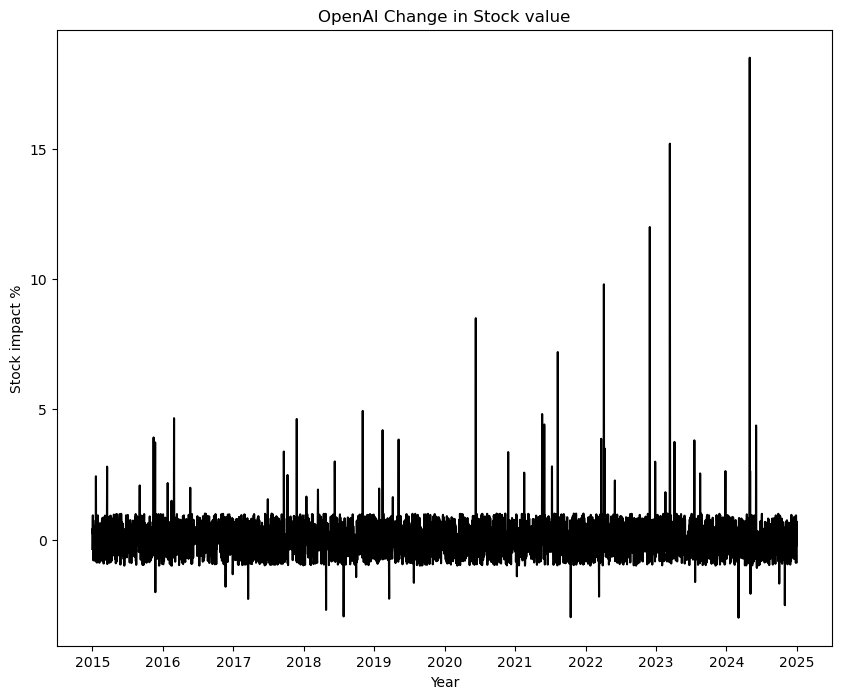

In [24]:
plt.figure(figsize=(10,8))
plt.plot(OpenAI_df['Date'],OpenAI_df['Stock_Impact_%'],color='black'),
plt.title('OpenAI Change in Stock value')
plt.xlabel('Year')
plt.ylabel('Stock impact %')
plt.show()

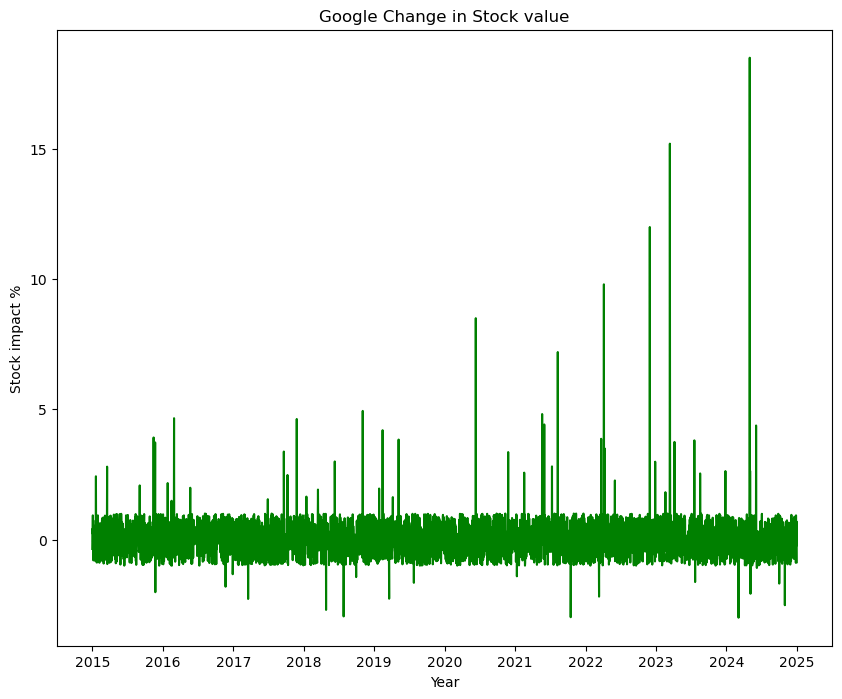

In [25]:
plt.figure(figsize=(10,8))
plt.plot(Google_df['Date'],OpenAI_df['Stock_Impact_%'],color='green'),
plt.title('Google Change in Stock value')
plt.xlabel('Year')
plt.ylabel('Stock impact %')
plt.show()

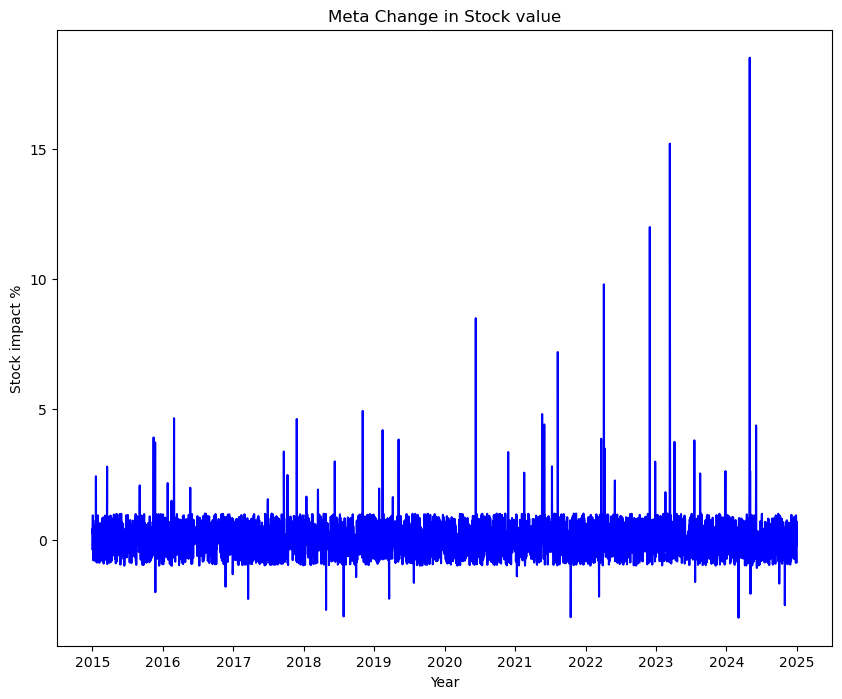

In [26]:
plt.figure(figsize=(10,8))
plt.plot(Meta_df['Date'],OpenAI_df['Stock_Impact_%'],color='blue'),
plt.title('Meta Change in Stock value')
plt.xlabel('Year')
plt.ylabel('Stock impact %')
plt.show()

In [27]:
OpenAI_df.sort_values(by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [28]:
Google_df.sort_values(by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [29]:
Meta_df.sort_values(by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
9732,2021-08-23,Meta,78.19,59.36,196.79,Cloud AI launch,4.80,2021
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


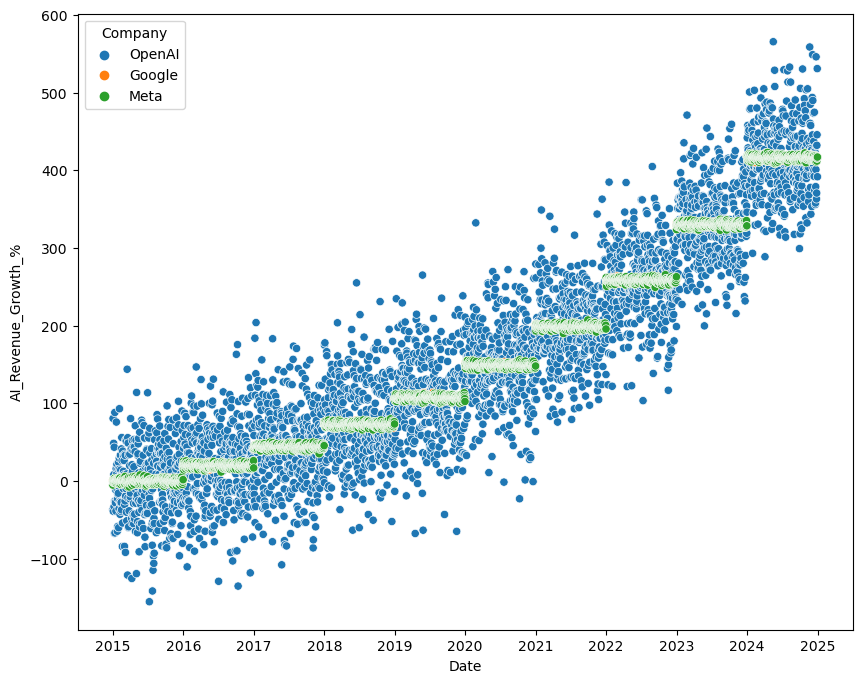

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Date', y='AI_Revenue_Growth_%', data = df,hue='Company')
plt.show()

In [31]:
df.sort_values(by = ['AI_Revenue_Growth_%'],ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3423,2024-05-16,OpenAI,8.47,6.65,565.50,NaN,0.51,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
...,...,...,...,...,...,...,...,...
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015


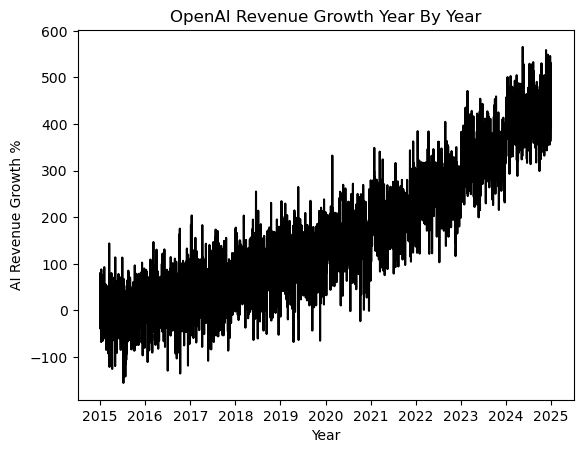

In [32]:
plt.plot(OpenAI_df['Date'],OpenAI_df['AI_Revenue_Growth_%'],color = 'black')
plt.title('OpenAI Revenue Growth Year By Year')
plt.xlabel('Year')
plt.ylabel('AI Revenue Growth %')
plt.show()

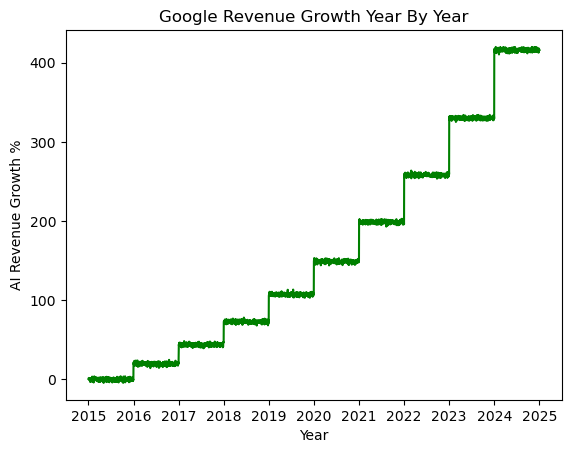

In [33]:
plt.plot(Google_df['Date'],Google_df['AI_Revenue_Growth_%'],color = 'green')
plt.title('Google Revenue Growth Year By Year')
plt.xlabel('Year')
plt.ylabel('AI Revenue Growth %')
plt.show()

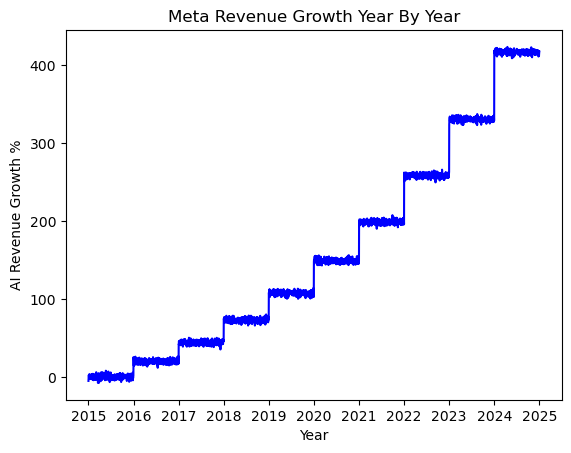

In [34]:
plt.plot(Meta_df['Date'],Meta_df['AI_Revenue_Growth_%'],color = 'blue')
plt.title('Meta Revenue Growth Year By Year')
plt.xlabel('Year')
plt.ylabel('AI Revenue Growth %')
plt.show()

In [35]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
Year,0.297701,0.526478,0.952199,0.016525,1.000000


<Axes: >

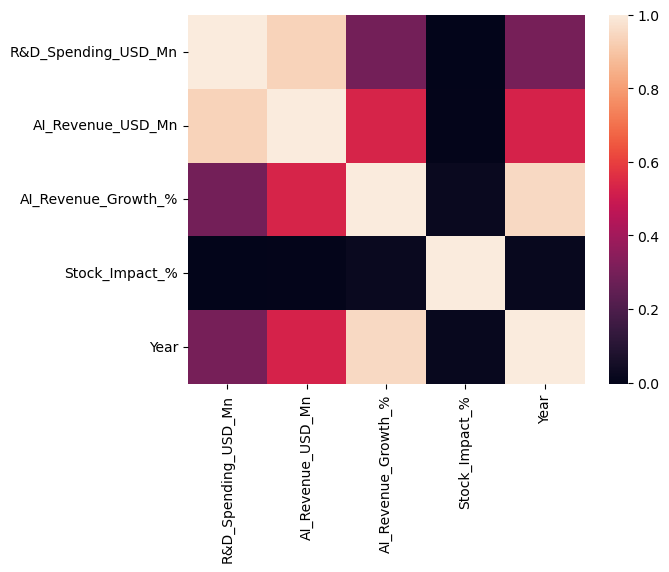

In [36]:
sns.heatmap(df.corr(numeric_only=True))

In [37]:
spend = df.groupby('Year')['R&D_Spending_USD_Mn'].sum()
spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

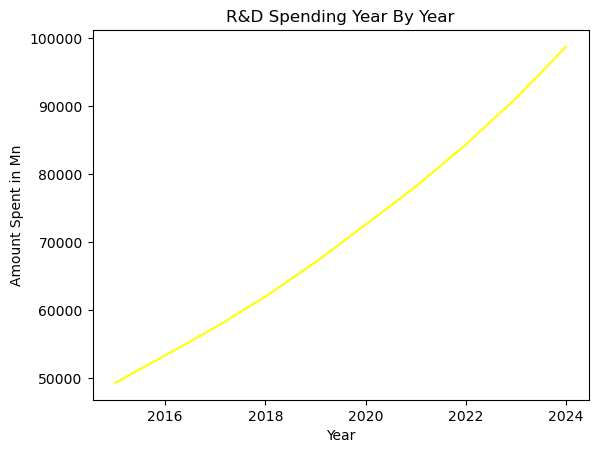

In [38]:
#showing R&D Expenditure
plt.plot(spend.index,spend.values,color = 'yellow')
plt.title('R&D Spending Year By Year')
plt.xlabel('Year')
plt.ylabel('Amount Spent in Mn')
plt.show()

In [39]:
revenue = df.groupby('Year')['AI_Revenue_USD_Mn'].sum()
revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

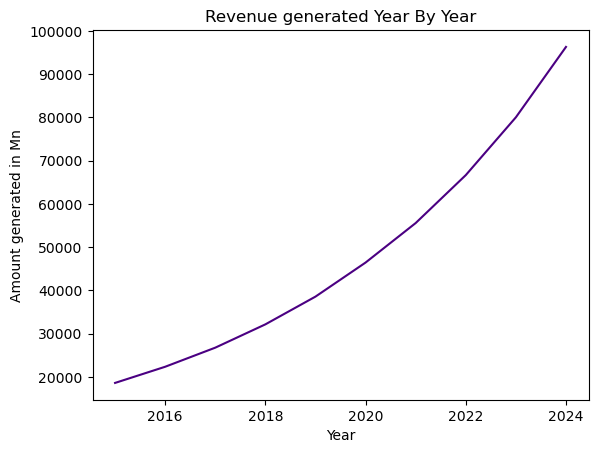

In [40]:
#showing the revenue generated
plt.plot(revenue.index,revenue.values,color='indigo')
plt.title('Revenue generated Year By Year')
plt.xlabel('Year')
plt.ylabel('Amount generated in Mn')
plt.show()

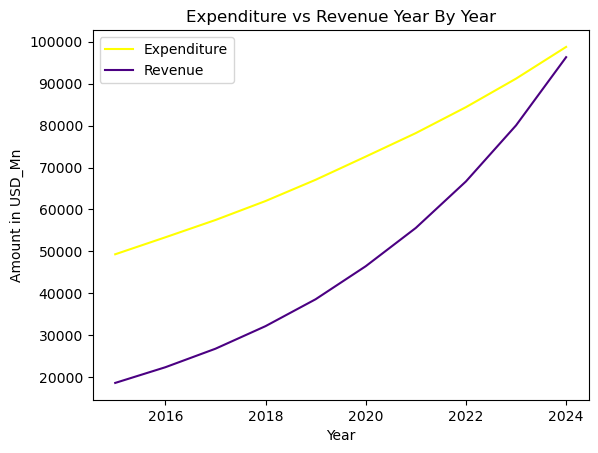

In [41]:
plt.plot(spend.index,spend.values,color = 'yellow')
plt.plot(revenue.index,revenue.values,color='indigo')
plt.title('Expenditure vs Revenue Year By Year')
plt.xlabel('Year')
plt.ylabel('Amount in USD_Mn')
plt.legend(['Expenditure','Revenue'])
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

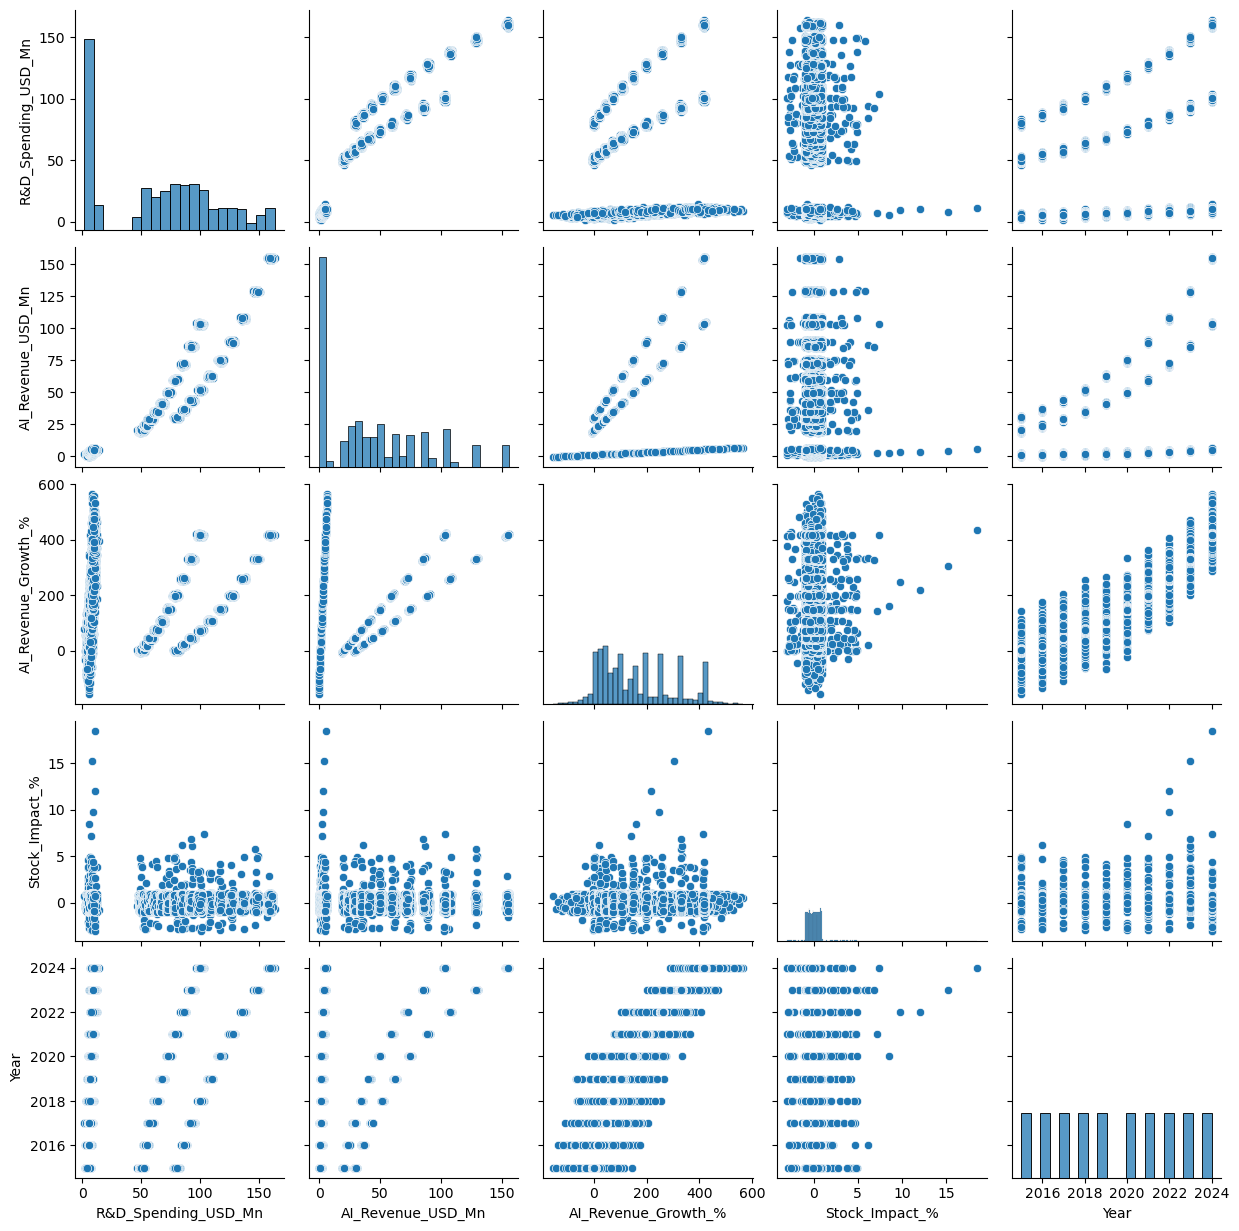

In [42]:
#pairplot to show relations between columns
sns.pairplot(df)

In [43]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [44]:
# Various Events
df.Event.value_counts()

Event
AI speech recognition release      37
AI-powered search update           32
AI Ads Optimization upgrade        32
AI partnership deal                32
AI Video Recommendation upgrade    29
Cloud AI launch                    27
AI ethics policy update            27
TensorFlow open-source release      1
LLaMA 2 release                     1
LLaMA 1 release                     1
Gemini AI release                   1
Bard chatbot launch                 1
MUM Search Model launch             1
BERT for Search launch              1
AlphaGo beats Lee Sedol             1
ChatGPT (GPT-3.5) launch            1
GPT-5 release (predicted)           1
GPT-4 release                       1
DALL·E 2 release                    1
Codex release                       1
GPT-3 release                       1
GPT-2 release                       1
GPT-1 release                       1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [45]:
#checking for a particular event
df[df.Event == 'MUM Search Model launch']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
5982,2021-05-18,Google,126.26,89.61,198.69,MUM Search Model launch,4.1,2021


In [46]:
MUM = df.loc[5972:5992]
MUM

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
5972,2021-05-08,Google,126.42,89.44,198.13,NaN,-0.25,2021
5973,2021-05-09,Google,127.16,89.78,199.28,NaN,0.86,2021
5974,2021-05-10,Google,126.73,88.97,196.56,NaN,0.67,2021
5975,2021-05-11,Google,127.88,89.79,199.30,NaN,0.66,2021
5976,2021-05-12,Google,128.08,89.93,199.77,NaN,-0.06,2021
5977,2021-05-13,Google,128.56,89.29,197.64,NaN,-0.71,2021
5978,2021-05-14,Google,127.46,88.77,195.90,NaN,0.21,2021
5979,2021-05-15,Google,126.78,89.86,199.52,NaN,0.93,2021
5980,2021-05-16,Google,125.58,89.37,197.91,NaN,-0.54,2021
5981,2021-05-17,Google,126.55,90.00,200.00,NaN,0.30,2021


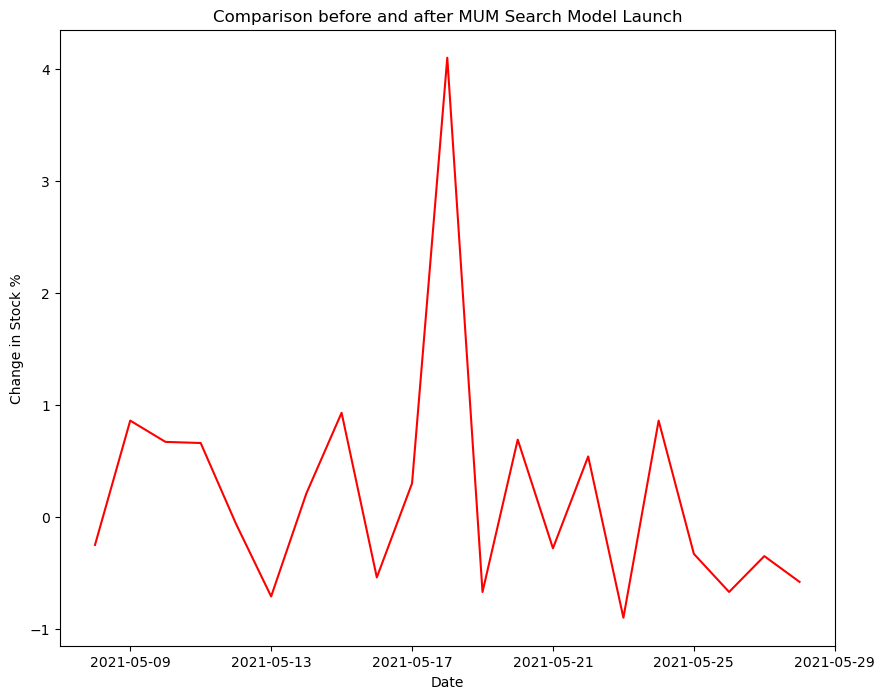

In [47]:
#showing impact with line chart
plt.figure(figsize=(10,8))
plt.plot(MUM['Date'],MUM['Stock_Impact_%'],color = 'r')
plt.title('Comparison before and after MUM Search Model Launch')
plt.xlabel('Date')
plt.ylabel('Change in Stock %')
plt.show()

In [48]:
#checking for a particular event
df[df.Event == 'Gemini AI release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.8,2023


In [49]:
GeminiAI = df.loc[6904:6924]
GeminiAI

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
6904,2023-11-26,Google,148.21,129.11,330.36,NaN,0.72,2023
6905,2023-11-27,Google,149.22,128.28,327.61,NaN,0.53,2023
6906,2023-11-28,Google,148.14,128.38,327.92,NaN,-0.95,2023
6907,2023-11-29,Google,149.32,129.05,330.16,NaN,-0.88,2023
6908,2023-11-30,Google,149.54,129.11,330.38,NaN,-0.64,2023
6909,2023-12-01,Google,147.03,129.14,330.46,NaN,0.63,2023
6910,2023-12-02,Google,148.36,129.31,331.02,NaN,0.11,2023
6911,2023-12-03,Google,149.20,129.08,330.26,NaN,-0.87,2023
6912,2023-12-04,Google,149.63,128.77,329.24,NaN,0.84,2023
6913,2023-12-05,Google,148.77,128.60,328.68,NaN,-0.40,2023


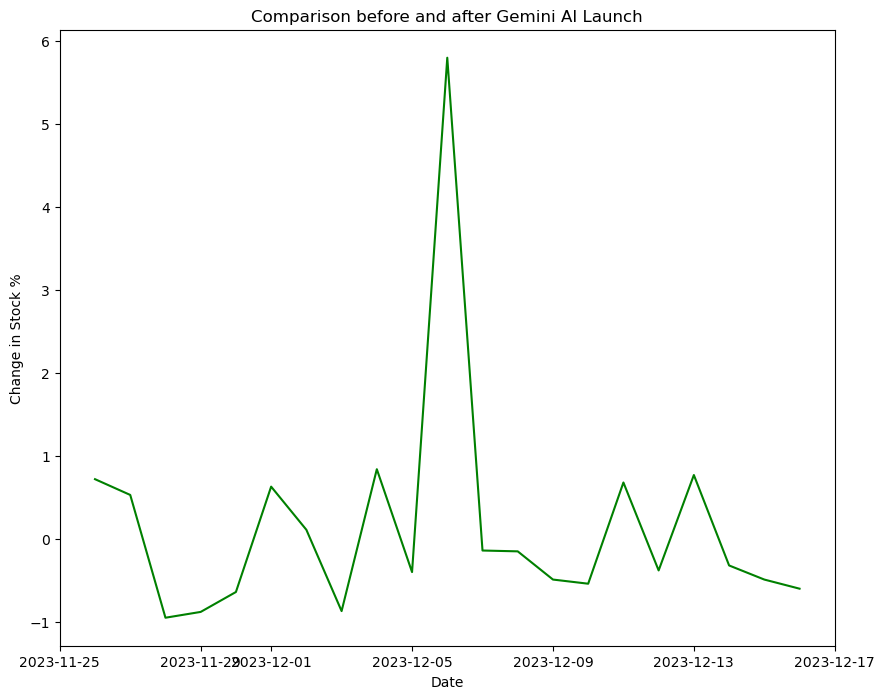

In [50]:
#showing impact with line chart
plt.figure(figsize=(10,8))
plt.plot(GeminiAI['Date'],GeminiAI['Stock_Impact_%'],color='g')
plt.title('Comparison before and after Gemini AI Launch')
plt.xlabel('Date')
plt.ylabel('Change in Stock %')
plt.show()

In [51]:
df.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [52]:
#Daily Avg Impacts on stock of Companies
df.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [53]:
#Daily Avg R&D Expenditure by Companies
df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [54]:
#Max Impacts % on stock of Companies
df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

In [55]:
#Highest Change in Index
stocks = df.groupby(['Year','Company'])['Stock_Impact_%'].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

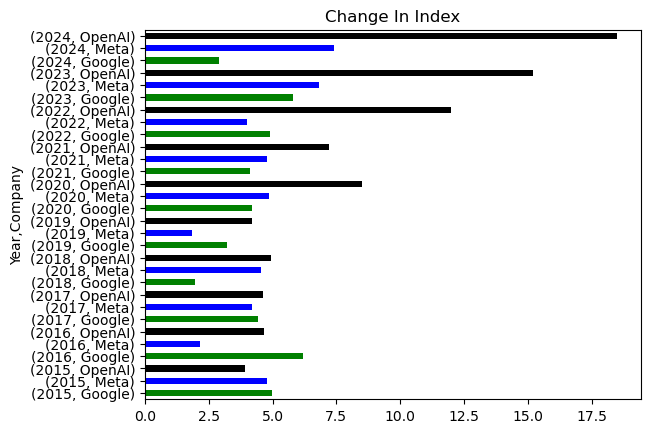

In [56]:
stocks.plot(kind='barh',color = ['Green','Blue','Black'])
plt.title('Change In Index')
plt.show()